In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
import lsst.sims.featureScheduler as fs
from astropy.coordinates import SkyCoord
from astropy import units as u


/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:29: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [2]:
nside = 32
ra, dec = fs.ra_dec_hp_map(nside=nside)

In [32]:
dec_upper_limit =33.  # Degrees

south_cap = -68.
north_cap = 14.

galac_window = 10.

In [4]:
result = np.zeros(ra.size)
coord = SkyCoord(ra=ra*u.rad, dec=dec*u.rad)
g_long, g_lat = coord.galactic.l.radian, coord.galactic.b.radian

eclip_lat = coord.barycentrictrueecliptic.lat.radian


In [33]:
goal_map = np.zeros(hp.nside2npix(nside), dtype=float) + hp.UNSEEN
# Fill in the entire region we want
goal_map[np.where(dec < np.radians(dec_upper_limit))] = 1
goal_map[np.where(dec < np.radians(south_cap))] = 0.5

goal_map[np.where((dec < np.radians(dec_upper_limit)) & (dec > np.radians(north_cap)))] = 0.5

goal_map[np.where( (np.abs( g_lat) < np.radians(galac_window)) & (dec < np.radians(dec_upper_limit)))] = 0.5

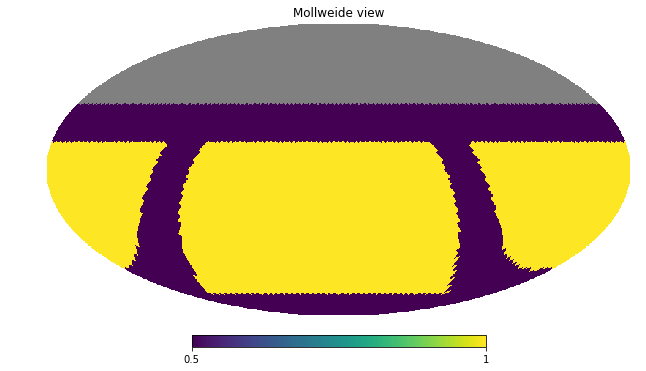

In [34]:
hp.mollview(goal_map)

In [35]:
# What area is in WFD?
wfd_area = np.where(goal_map == 1)[0].size*hp.nside2pixarea(nside, degrees=True)
print('wfd_area in sq deg=', wfd_area)

wfd_area in sq deg= 20012.1176764
